In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!gdown 1I9aPAvvYgQWdHGKtnd7IeTGXpx8vOm4h
!gdown 1-8TsrqTRFP-q9TM-6HinhO0ZVXFHq9TB
!gdown 1-AlW7oNJHaqi3xk_9dWHUS52Dzl_FmFW

Downloading...
From: https://drive.google.com/uc?id=1I9aPAvvYgQWdHGKtnd7IeTGXpx8vOm4h
To: /content/title_brand.csv
100% 97.3M/97.3M [00:00<00:00, 182MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-8TsrqTRFP-q9TM-6HinhO0ZVXFHq9TB
To: /content/test_data.csv
100% 15.6M/15.6M [00:00<00:00, 130MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-AlW7oNJHaqi3xk_9dWHUS52Dzl_FmFW
To: /content/train_data.csv
100% 635M/635M [00:04<00:00, 143MB/s]


In [14]:
review_df = pd.read_csv('/content/train_data.csv')
review_df

<ipython-input-14-e0df2b51f335>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  review_df = pd.read_csv('/content/train_data.csv')


overall vote  verified  reviewTime      reviewerID        asin style  \
0             2  NaN     False  2016-11-11   A2OSUEZJIN7BI  0511189877   NaN   
1             5  NaN      True  2016-06-06  A2NETQRG6JHIG7  0511189877   NaN   
2             4  NaN      True  2016-03-10  A12JHGROAX49G7  0511189877   NaN   
3             5  NaN      True  2016-01-14  A1KV65E2TMMG6F  0511189877   NaN   
4             5  NaN      True  2016-10-20  A280POPEWI0NSA  0594459451   NaN   
...         ...  ...       ...         ...             ...         ...   ...   
838939        5  NaN      True  2017-07-25  A1OOVLE2KZ6KGA  B01HJCN1EI   NaN   
838940        1  NaN      True  2017-04-04   A77K1B31UAQ29  B01HJCN1EI   NaN   
838941        3  NaN      True  2017-07-08  A2SVXUVUAWUDK2  B01HJH42KU   NaN   
838942        5  2.0      True  2016-12-01  A2HUZO7MQAY5I2  B01HJH40WU   NaN   
838943        5  NaN      True  2017-03-31  A1FGCIRPRNZWD5  B01HJF704M   NaN   

             reviewerName                                         reviewText  \
0                   Chris  I have an older URC-WR7 remote and thought thi...   
1            Qrysta White  First time I've EVER had a remote that needed ...   
2                 Linwood  Got them and only 2 of them worked. company ca...   
3           Dane Williams  I got tired of the remote being on the wrong s...   
4             Kristina H.  After purchasing cheap cords from another webs...   
...                   ...                                                ...   
838939            Puddzee  These are my favorite charging cords for a few...   
838940  addictedtoreading  Update....after 2 months of gentle use, cable ...   
838941             Andrew  These are okay. The connection becomes very if...   
838942     michael clontz  Ok here is an odd thing that happened to me, I...   
838943             Brando  I have it plugged into a usb extension on my g...   

                                                  summary  unixReviewTime  
0                                            Cannot Learn      1478822400  
1                     zero programming needed!  Miracle!?      1465171200  
2                           Works Good and programs easy.      1457568000  
3                                      Same as TWC remote      1452729600  
4                                       Good Quality Cord      1476921600  
...                                                   ...             ...  
838939                                   Worth the price.      1500940800  
838940                  UPDATE...BREAKS AND SLOW CHARGING      1491264000  
838941  Hope this makes sense. You'd understand if you...      1499472000  
838942     Not the correct product as linked in the sale.      1480550400  
838943                                Works well enough..      1490918400  

[838944 rows x 11 columns]

In [97]:
review_df.isna().sum()

overall                0
vote              647476
verified               0
reviewTime             0
reviewerID             0
asin                   0
style             348331
reviewerName         202
reviewText             0
summary               75
unixReviewTime         0
dtype: int64

In [45]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838944 entries, 0 to 838943
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         838944 non-null  int64 
 1   vote            191468 non-null  object
 2   verified        838944 non-null  bool  
 3   reviewTime      838944 non-null  object
 4   reviewerID      838944 non-null  object
 5   asin            838944 non-null  object
 6   style           490613 non-null  object
 7   reviewerName    838742 non-null  object
 8   reviewText      838944 non-null  object
 9   summary         838869 non-null  object
 10  unixReviewTime  838944 non-null  int64 
dtypes: bool(1), int64(2), object(8)
memory usage: 64.8+ MB


part 1.1

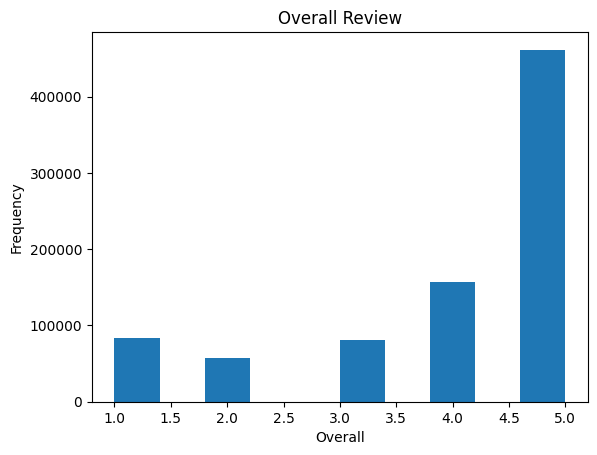

In [ ]:
plt.hist(train_df['overall'])
plt.xlabel('Overall')
plt.ylabel('Frequency')
plt.title('Overall Review')
plt.show()

آیا نیاز است برای مدل‌سازی خود آن را متوازن کنید؟ چه راه‌حلی برای این کار پیشنهاد می‌کنید؟


part 1.2

In [4]:
labels = {1:'neg', 2:'neg', 3:'nuet', 4:'pos', 5:'pos'}
review_df['emotion'] = review_df['overall'].map(labels)

In [8]:
from wordcloud import WordCloud, STOPWORDS

def words_cloud_generator(text, title):
  wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords = set(STOPWORDS))
  wordcloud.generate(text)
  plt.figure(figsize=(10, 5))
  plt.title(title)
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()

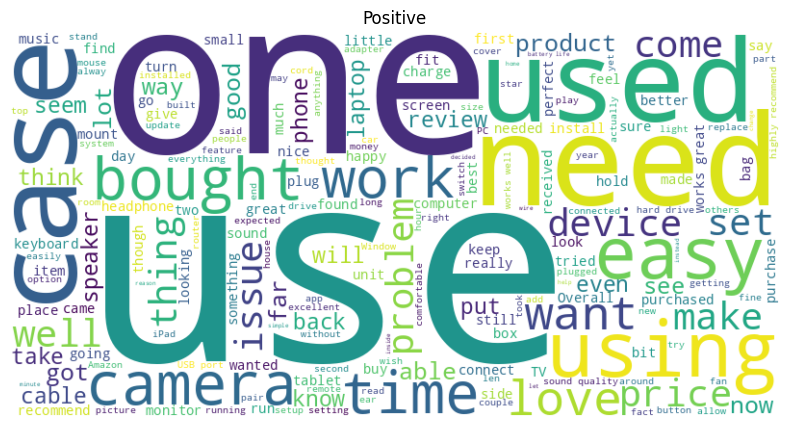

In [9]:
words_cloud_generator(" ".join(review_df[review_df['emotion'] == 'pos']['reviewText']), 'Positive')

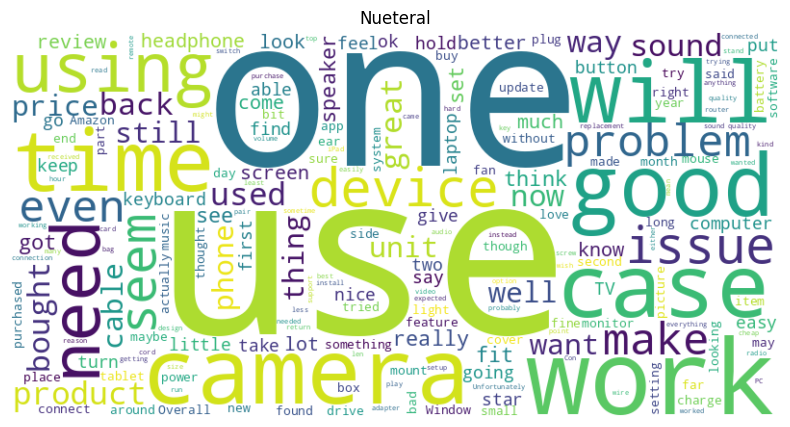

In [10]:
words_cloud_generator(" ".join(review_df[review_df['emotion'] == 'nuet']['reviewText']), 'Nueteral')

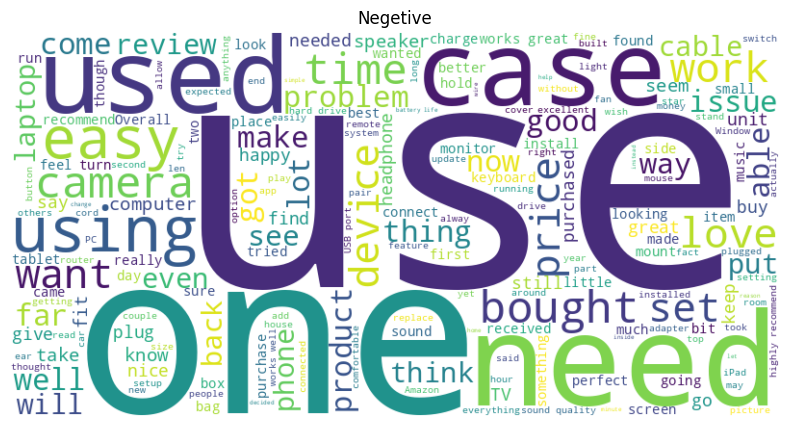

In [11]:
words_cloud_generator(" ".join(review_df[review_df['emotion'] == 'pos']['reviewText']), 'Negetive')

part 1.3

In [5]:
top_10_review = review_df[['reviewerName', 'vote']].dropna()
top_10_review['vote'] = top_10_review['vote'].astype('str')
top_10_review['vote'] = top_10_review['vote'].apply(lambda x: x.replace(',', '')).astype('float16')
top_10_review = top_10_review.sort_values('vote', ascending=False)[0:10]
top_10_review

reviewerName    vote
661072     Voltron00x  2846.0
669664        Cthulhu  2432.0
653614       Sally B.  1875.0
607633  Mark A. Baker  1820.0
680944    avirtualcfo  1560.0
716075        Obi Wan  1542.0
704037        Michele  1524.0
456142         nycebo  1489.0
449157         nycebo  1489.0
670949       Gromulus  1372.0

part 1.4

In [91]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Histogram(x=review_df['reviewText'].apply(lambda x: len(x)), name='review lenth', nbinsx=500))
fig.show()

In [96]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=review_df['reviewText'].apply(lambda x: len(x) if len(x) < 2500 else None), name='review lenth', nbinsx=500))
fig.show()

part 1.5

In [6]:
brands_df = pd.read_csv('/content/title_brand.csv')
brands_df

asin                                              title  \
0       0011300000  Genuine Geovision 1 Channel 3rd Party NVR IP S...   
1       0043396828  Books "Handbook of Astronomical Image Processi...   
2       0060009810                                     One Hot Summer   
3       0060219602  Hurray for Hattie Rabbit: Story and pictures (...   
4       0060786817                     sex.lies.murder.fame.: A Novel   
...            ...                                                ...   
786440  B01HJGOOMW  Tukzer Cassette Player Portable Tape Player Ca...   
786441  B01HJH3XLE  Cobiter AC Adapter Battery Charger For IBM LEN...   
786442  B01HJH6CEY  Baofeng Original Li-ion Battery Charger Deskto...   
786443  B01HJH40WU  Jricoo 3pack 6ft Micro USB to USB Cable 2.0 6f...   
786444  B01HJH42KU  Jricoo Nylon Braided 2.0 Micro USB Charging Ca...   

                                               brand  
0                                          GeoVision  
1                                       33 Books Co.  
2       Visit Amazon's Carolina Garcia Aguilera Page  
3                Visit Amazon's Dick Gackenbach Page  
4                   Visit Amazon's Lolita Files Page  
...                                              ...  
786440                                        Tukzer  
786441                                       Cobiter  
786442                                       COOLBOY  
786443                                        Jricoo  
786444                                        Jricoo  

[786445 rows x 3 columns]

In [15]:
review_df = review_df.merge(brands_df, on='asin')
review_df.head()

overall vote  verified  reviewTime      reviewerID        asin style  \
0        2  NaN     False  2016-11-11   A2OSUEZJIN7BI  0511189877   NaN   
1        5  NaN      True  2016-06-06  A2NETQRG6JHIG7  0511189877   NaN   
2        4  NaN      True  2016-03-10  A12JHGROAX49G7  0511189877   NaN   
3        5  NaN      True  2016-01-14  A1KV65E2TMMG6F  0511189877   NaN   
4        5  NaN      True  2016-10-20  A280POPEWI0NSA  0594459451   NaN   

    reviewerName                                         reviewText  \
0          Chris  I have an older URC-WR7 remote and thought thi...   
1   Qrysta White  First time I've EVER had a remote that needed ...   
2        Linwood  Got them and only 2 of them worked. company ca...   
3  Dane Williams  I got tired of the remote being on the wrong s...   
4    Kristina H.  After purchasing cheap cords from another webs...   

                               summary  unixReviewTime  \
0                         Cannot Learn      1478822400   
1  zero programming needed!  Miracle!?      1465171200   
2        Works Good and programs easy.      1457568000   
3                   Same as TWC remote      1452729600   
4                    Good Quality Cord      1476921600   

                                               title               brand  
0  CLIKR-5 Time Warner Cable Remote Control UR5U-...                 URC  
1  CLIKR-5 Time Warner Cable Remote Control UR5U-...                 URC  
2  CLIKR-5 Time Warner Cable Remote Control UR5U-...                 URC  
3  CLIKR-5 Time Warner Cable Remote Control UR5U-...                 URC  
4  Barnes &amp; Noble Nook Color Tablet USB Cable...  Barnes &amp; Noble

In [43]:
top_10_overall = review_df[review_df['overall'] == 5][['title', 'brand']].value_counts().reset_index(name='count').head(10)
top_10_overall

title                 brand  \
0  OontZ Angle 3 Enhanced Stereo Edition IPX5 Spl...  Cambridge Soundworks   
1          NETGEAR N300 WiFi Range Extender (EX2700)               NETGEAR   
2  Roku Streaming Stick (3600R) - HD Streaming Pl...                  Roku   
3  StarTech USB 2.0 to SATA IDE Adapter (USB2SATA...              StarTech   
4  Logitech M570 Wireless Trackball Mouse &ndash;...              Logitech   
5  Samsung 850 EVO 500GB 2.5-Inch SATA III Intern...               Samsung   
6  NETGEAR 5-Port Gigabit Ethernet Unmanaged Swit...               NETGEAR   
7  ASUS Tri-Band Gigabit (AC3200) WiFi Router (Up...                  Asus   
8  VideoSecu ML531BE TV Wall Mount for Most 27&qu...             VideoSecu   
9  Cheetah Mounts APFMSB TV Wall Mount Bracket fo...               Cheetah   

   count  
0   1163  
1    659  
2    600  
3    598  
4    552  
5    529  
6    482  
7    471  
8    448  
9    434

part 1.6

In [40]:
top_10_brands = review_df['brand'].value_counts().head(10).index
mask = review_df['brand'].isin(top_10_brands)
review_df[mask].groupby('brand')['overall'].mean().sort_values(ascending=False)

brand
Anker           4.244320
AmazonBasics    4.201468
Sabrent         4.028005
SanDisk         3.958810
Logitech        3.954061
Samsung         3.941268
Sony            3.938726
TP-LINK         3.928681
Asus            3.855550
NETGEAR         3.836274
Name: overall, dtype: float64